The company of this exercise is a social network. They decided to add a feature called: Recommended Friends, i.e. they suggest people you may know.
A data scientist has built a model to suggest 5 people to each user. These potential friends will be shown on the user newsfeed. At first, the model is tested just on a random subset of users to see how it performs compared to the newsfeed without the new feature.
The test has been running for some time and your boss asks you to check the results. You are asked to check, for each user, the number of pages visited during their first session since the test started. If this number increased, the test is a success.

Specifically, your boss wants to know:
1. Is the test winning? That is, should 100% of the users see the Recommended Friends feature?
2. Is the test performing similarly for all user segments or are there differences among different segments?
3. If you identified segments that responded differently to the test, can you guess the reason? Would this change your point 1 conclusions?

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

In [2]:
test_table = pd.read_csv('test_table.csv')

In [3]:
user_table = pd.read_csv('user_table.csv')

In [4]:
test_table.head()

,user_id,date,browser,test,pages_visited
0,600597,2015-08-13,IE,0,2
1,4410028,2015-08-26,Chrome,1,5
2,6004777,2015-08-17,Chrome,0,8
3,5990330,2015-08-27,Safari,0,8
4,3622310,2015-08-07,Firefox,0,1


In [5]:
user_table.head()

,user_id,signup_date
0,34,2015-01-01
1,59,2015-01-01
2,178,2015-01-01
3,285,2015-01-01
4,383,2015-01-01


In [6]:
## Metrics is the number of page visited per session

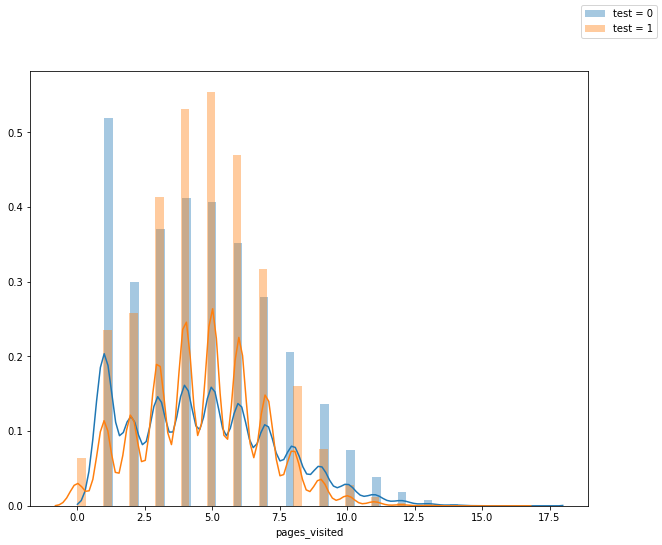

In [12]:
fig, ax = plt.subplots(figsize = (10,8))
sns.distplot(test_table[test_table['test'] ==0]['pages_visited'], ax= ax)
sns.distplot(test_table[test_table['test'] ==1]['pages_visited'], ax= ax)
fig.legend(labels=['test = 0','test = 1'])
plt.show()

In [23]:
grouped_browser= test_table.groupby(['browser', 'test'])['pages_visited'].mean().reset_index()

In [24]:
grouped_browser

,browser,test,pages_visited
0,Chrome,0,4.613341
1,Chrome,1,4.690680
2,Firefox,0,4.600164
3,Firefox,1,4.714259
4,IE,0,4.598478
5,IE,1,4.685985
6,Opera,0,4.546438
7,Opera,1,0.000000
8,Safari,0,4.638180
9,Safari,1,4.692336


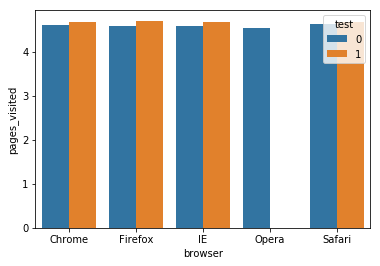

In [26]:
sns.barplot(y ='pages_visited', x= 'browser',hue = 'test', data= grouped_browser )

In [27]:
df = test_table.merge(user_table, how = 'left', on = 'user_id')

In [31]:
df.head()

,user_id,date,browser,test,pages_visited,signup_date
0,600597,2015-08-13,IE,0,2,2015-01-19
1,4410028,2015-08-26,Chrome,1,5,2015-05-11
2,6004777,2015-08-17,Chrome,0,8,2015-06-26
3,5990330,2015-08-27,Safari,0,8,2015-06-25
4,3622310,2015-08-07,Firefox,0,1,2015-04-17


In [34]:
df['date'] = pd.to_datetime(df['date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [37]:
df['days'] = (df['date'] - df['signup_date']).dt.days

In [39]:
df.head()

,user_id,date,browser,test,pages_visited,signup_date,days
0,600597,2015-08-13,IE,0,2,2015-01-19,206
1,4410028,2015-08-26,Chrome,1,5,2015-05-11,107
2,6004777,2015-08-17,Chrome,0,8,2015-06-26,52
3,5990330,2015-08-27,Safari,0,8,2015-06-25,63
4,3622310,2015-08-07,Firefox,0,1,2015-04-17,112


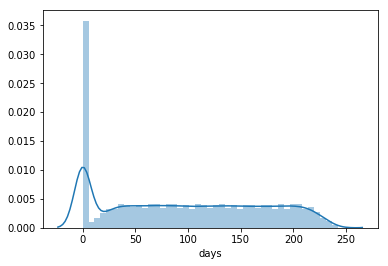

In [41]:
sns.distplot(df['days'])

### Question 1: Is the test winning? That is, should 100% of the users see the Recommended Friends feature?

In [43]:
control= test_table[test_table['test'] == 0]['pages_visited'].values
test = test_table[test_table['test'] == 1]['pages_visited'].values

In [46]:
ss.ttest_ind(test, control, equal_var= False)

Ttest_indResult(statistic=-0.5571118435554797, pvalue=0.5774523171559118)

In [47]:
ss.ttest_ind(test, control, equal_var= False).pvalue

0.5774523171559118

P value is 0.577 which is much greater than 0.05. The test result is not statistically significant

### Question 2: Is the test performing similarly for all user segments or are there differences among different segments?

Please check above data visulization. Clearly the browser type, Opera has 0 page vi

In [49]:
# remove the browser Opera
subset = test_table[test_table['browser'] != 'Opera']

In [50]:
control = subset[subset['test'] ==0]['pages_visited'].values
test = subset[subset['test'] ==1]['pages_visited'].values

In [54]:
ss.ttest_ind(control, test, equal_var= False).pvalue

4.403954129457701e-08

In [55]:
# Test is significant now